In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Data

In [2]:
data_dir = '../Dataset'
dir_names = os.listdir(data_dir)
print(dir_names)
print(f'Number of class: {len(dir_names)}')

['cendrawasih', 'ceplok', 'lasem', 'megamendung', 'merak_abyorhokokai', 'parang', 'sekar_jagad', 'sidoluhur', 'sido_asih', 'singa_barong', 'sogan', 'tambal', 'tujuh_rupa']
Number of class: 13


### Split into training and validation

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split = 0.2)

val_datagen = ImageDataGenerator(rescale= 1/255.0,
        validation_split = 0.2)

# Flow validation images in batches of 20 using test_datagen generator

train_generator = train_datagen.flow_from_directory(
    data_dir, 
    target_size = (150, 150),
    batch_size = 20,
    shuffle = True,
    class_mode = 'categorical',
    subset = 'training',
    seed = 42
)

val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'validation',
    seed = 42
)

Found 1309 images belonging to 13 classes.
Found 322 images belonging to 13 classes.


In [4]:
len(train_generator)

66

In [6]:
class_label = train_generator.class_indices
class_label

{'cendrawasih': 0,
 'ceplok': 1,
 'lasem': 2,
 'megamendung': 3,
 'merak_abyorhokokai': 4,
 'parang': 5,
 'sekar_jagad': 6,
 'sido_asih': 7,
 'sidoluhur': 8,
 'singa_barong': 9,
 'sogan': 10,
 'tambal': 11,
 'tujuh_rupa': 12}

## Model

In [5]:
model_v1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),    
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),    
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(13, activation='softmax')
])

In [6]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
model_v1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [7]:
epoch = 80
history_v1 = model_v1.fit(train_generator,
         steps_per_epoch= len(train_generator), # 1300 images = batch*step,
         epochs=epoch,
         validation_data=val_generator,
         validation_steps=16, # 320 images = batch * step
         verbose=2)

Epoch 1/80
66/66 - 95s - loss: 2.4235 - accuracy: 0.1658 - val_loss: 2.2781 - val_accuracy: 0.1906 - 95s/epoch - 1s/step
Epoch 2/80


KeyboardInterrupt: 

In [10]:
import pandas as pd

def save_history_model(model,history, ver):
    # convert history to pd Dataframe
    hist_df = pd.DataFrame(history.history)

    # define path
    hist_csv_file = f'../Model_history/history_v{ver}.csv'
    model_file = f'../Model_history/model_v{ver}'   

    # Save model in SavedModel format
    model.save(model_file)
    # Save history
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)

In [11]:
# Save model_v1
save_history_model(model_v1, history_v1, 2)

INFO:tensorflow:Assets written to: ../Model_history/model_v2\assets


INFO:tensorflow:Assets written to: ../Model_history/model_v2\assets


In [12]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b',color='green' ,label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'b',color = 'green', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

C:\Users\ptrir\AppData\Local\Temp\ipykernel_21380\4041788006.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b',color='green' ,label='Validation accuracy')
C:\Users\ptrir\AppData\Local\Temp\ipykernel_21380\4041788006.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b',color = 'green', label='Validation Loss')


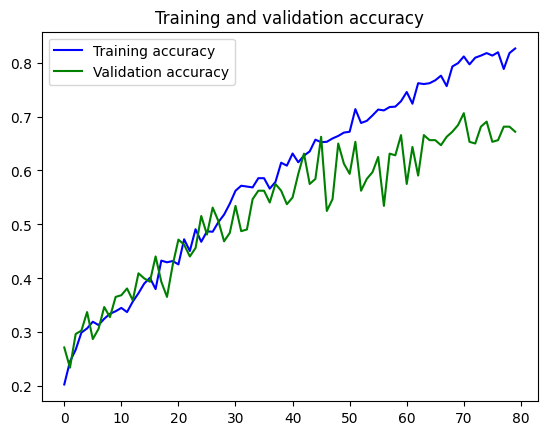

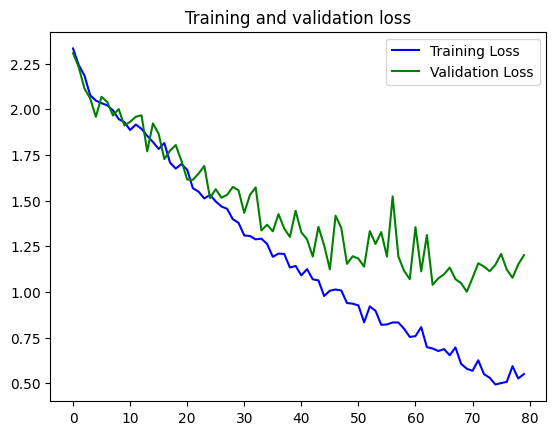

In [13]:
plot_loss_acc(history_v1)